In [14]:
import torch
import torchvision
import pandas
import matplotlib.pyplot as plt

from data_utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
print(device)

cuda:0


In [16]:
full_train_df = pandas.read_csv('data/train.csv')
full_train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
full_train_df['label'].describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

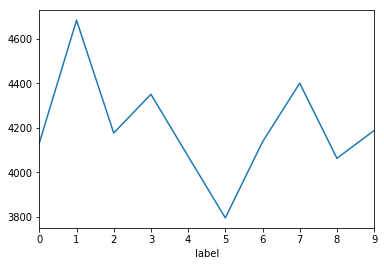

In [18]:
label_count_df = full_train_df.groupby('label')['label'].count().plot()
label_count_df

In [19]:
full_train_data = MnistKaggleTrainDataset()

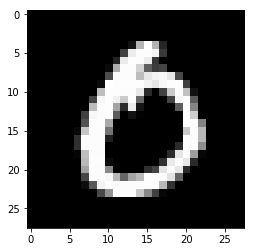

In [20]:
plt.close()
plt.imshow(full_train_data[200][0].view(28, 28), cmap='gray')

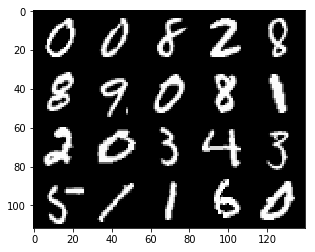

In [21]:
import random
random_indices = random.sample(range(0, len(full_train_data)), 20)
random_train_data = []
for index in random_indices:
    random_train_data.append(full_train_data[index][0])
combined_image = torchvision.utils.make_grid(random_train_data, nrow=5, padding=0)
plt.imshow(combined_image.permute(1,2,0), cmap='gray')

In [22]:
train_ratio = 0.8
train_size = int(len(full_train_data) * train_ratio)
val_size = len(full_train_data) - train_size
train_size

33600

In [23]:
from torch.utils import data

train_data, val_data = data.random_split(full_train_data, [train_size, val_size])
print(len(train_data), len(val_data))

33600 8400


In [24]:
overfit_train_size = 50
overfit_train_data, _ = data.random_split(train_data, [overfit_train_size, train_size-overfit_train_size])
len(overfit_train_data)

50

In [31]:
from cnn import ClassificationCNN
from solver import Solver

overfit_train_loader = data.DataLoader(overfit_train_data, batch_size=overfit_train_size, shuffle=False, num_workers=4)
val_loader = data.DataLoader(val_data, batch_size=overfit_train_size, shuffle=False, num_workers=4)

overfit_model = ClassificationCNN()
# overfit_model.to(device)

solver = Solver()
solver.train(device, overfit_model, overfit_train_loader, val_loader, num_epochs=100, log_nth=0)

Epoch: 1/100, [Train] Loss: 2.279874801635742, Accuracy: 0.24
Epoch: 1/100, [Valid] Loss: 0.014585448804896433, Accuracy: 0.0009963151927437647
Epoch: 2/100, [Train] Loss: 2.0974013805389404, Accuracy: 0.3
Epoch: 2/100, [Valid] Loss: 0.014445126403013325, Accuracy: 0.0010806405895691608
Epoch: 3/100, [Train] Loss: 2.018200635910034, Accuracy: 0.34
Epoch: 3/100, [Valid] Loss: 0.013845151560613358, Accuracy: 0.0012549603174603168
Epoch: 4/100, [Train] Loss: 1.8497470617294312, Accuracy: 0.48
Epoch: 4/100, [Valid] Loss: 0.0134341480028805, Accuracy: 0.0013732993197278906
Epoch: 5/100, [Train] Loss: 1.709610939025879, Accuracy: 0.58
Epoch: 5/100, [Valid] Loss: 0.013445369519141255, Accuracy: 0.0012903911564625832
Epoch: 6/100, [Train] Loss: 1.6304881572723389, Accuracy: 0.56
Epoch: 6/100, [Valid] Loss: 0.013627044332811351, Accuracy: 0.0012329931972789112
Epoch: 7/100, [Train] Loss: 1.569262981414795, Accuracy: 0.52
Epoch: 7/100, [Valid] Loss: 0.013675595910336966, Accuracy: 0.001258503401

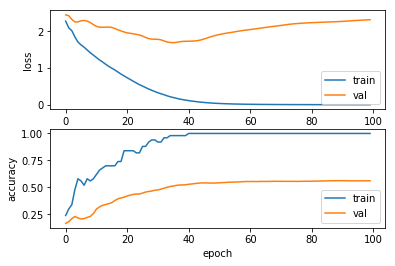

In [37]:
plt.subplot(2, 1, 1)
plt.plot(solver.train_loss_history)
plt.plot(solver.val_loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history)
plt.plot(solver.val_acc_history)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc='lower right')

plt.show()

In [43]:
batch_size = 256

train_loader = data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = data.DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=4)

model = ClassificationCNN()
# overfit_model.to(device)

solver = Solver()
solver.train(device, model, train_loader, val_loader, num_epochs=5, log_nth=100)

Iteration: 100/660, Loss: 0.4326905906200409
Epoch: 1/5, [Train] Loss: 0.9982233633371916, Accuracy: 0.6658676609848485
Epoch: 1/5, [Valid] Loss: 0.2951756580309434, Accuracy: 0.9076340326340326
Iteration: 100/660, Loss: 0.15536580979824066
Epoch: 2/5, [Train] Loss: 0.2060687370372541, Accuracy: 0.9343335700757576
Epoch: 2/5, [Valid] Loss: 0.17764656177975915, Accuracy: 0.9403226981351982
Iteration: 100/660, Loss: 0.09433995932340622
Epoch: 3/5, [Train] Loss: 0.14215716330165212, Accuracy: 0.9552852746212122
Epoch: 3/5, [Valid] Loss: 0.12815595147284595, Accuracy: 0.9594259906759907
Iteration: 100/660, Loss: 0.08747662603855133
Epoch: 4/5, [Train] Loss: 0.11053472421498912, Accuracy: 0.9651692708333334
Epoch: 4/5, [Valid] Loss: 0.10840400782498447, Accuracy: 0.9665191579254079
Iteration: 100/660, Loss: 0.022094808518886566
Epoch: 5/5, [Train] Loss: 0.0900970705869523, Accuracy: 0.9708510890151515
Epoch: 5/5, [Valid] Loss: 0.10293834498434355, Accuracy: 0.9669289044289044


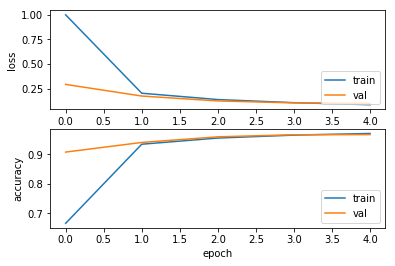

In [44]:
plt.subplot(2, 1, 1)
plt.plot(solver.train_loss_history)
plt.plot(solver.val_loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history)
plt.plot(solver.val_acc_history)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc='lower right')

plt.show()

In [51]:
test_loader = data.DataLoader(MnistKaggleTestDataset(), batch_size=1, shuffle=False, num_workers=1)

model.eval()

with open('result.txt', 'w+') as fp:
    for id, input in enumerate(test_loader):
        input = input.to(device).float()

        score = model(input)

        prediction = torch.argmax(score, dim=1)

        fp.write('{},{}\n'.format(id+1, prediction[0]))

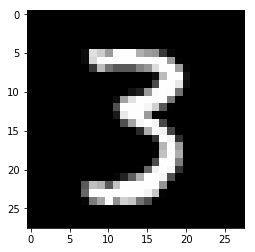

In [57]:
plt.close()
plt.imshow(MnistKaggleTestDataset()[27997].view(28, 28), cmap='gray')